In [3]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import json

In [8]:
CONVERTED_DATABASE_NAME = '/home/ubuntu/HeLa_20KInt-rt-0-7021/HeLa_20KInt.sqlite'

In [9]:
MS1_CE = 10

In [10]:
db_conn = sqlite3.connect(CONVERTED_DATABASE_NAME)
ms1_frame_properties_df = pd.read_sql_query("select frame_id,retention_time_secs from frame_properties where collision_energy == {}".format(MS1_CE), db_conn)
db_conn.close()

In [11]:
# get the ms1 frame IDs
ms1_frame_ids = tuple(ms1_frame_properties_df.astype(int).values[:,0])

In [12]:
db_conn = sqlite3.connect(CONVERTED_DATABASE_NAME)
frame_intensity_df = pd.read_sql_query("select frame_id,sum(intensity),retention_time_secs from frames where frame_id in {} group by frame_id order by retention_time_secs".format(ms1_frame_ids), db_conn)
db_conn.close()

In [13]:
frame_intensity_df.head()

,frame_id,sum(intensity),retention_time_secs
0,1,26728125,0.699237
1,2,25924637,0.801334
2,8,27640938,1.524905
3,19,29113986,2.703392
4,30,31367841,3.883114


In [14]:
frame_intensity_df.rename(columns={'sum(intensity)':'intensity'}, inplace=True)


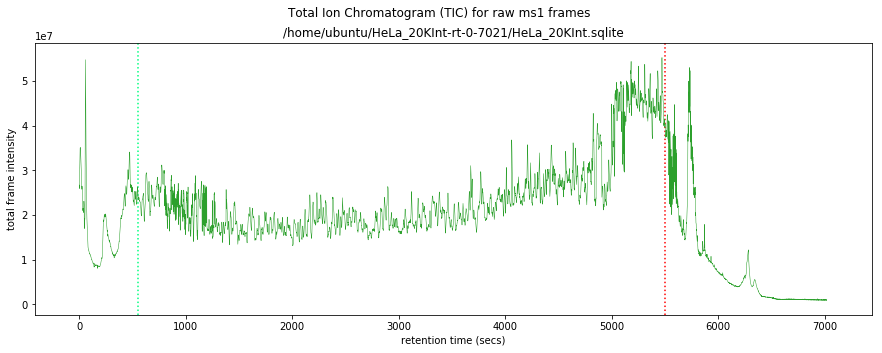

In [17]:
f, ax1 = plt.subplots()
f.set_figheight(5)
f.set_figwidth(15)
ax1.set_ylabel('total frame intensity')
ax1.set_xlabel('retention time (secs)')
plt.axvline(x=550, linestyle=':', color='springgreen')
plt.axvline(x=5500, linestyle=':', color='red')
ax1.plot(frame_intensity_df.retention_time_secs, frame_intensity_df.intensity, marker='', linestyle='-', linewidth=0.5, ms=2, color='tab:green', label='frame')
plt.margins(0.06)
plt.suptitle('Total Ion Chromatogram (TIC) for raw ms1 frames')
plt.title('{}'.format(CONVERTED_DATABASE_NAME))
plt.show()